# <center> <font color='#8e44c7'> Customer Segmentation using Fuzzy Clustering </font>   </center>


In [128]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime
import plotly.express as px
import plotly.figure_factory as ff

import matplotlib.pyplot as plt

### Clustering libraries
from sklearn.cluster import KMeans

### Clustering Metrics
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score

import warnings
warnings.filterwarnings('ignore')

In [129]:
def side_by_side(*objs, **kwds):
    from pandas.io.formats.printing import adjoin
    space = kwds.get('space', 4)
    reprs = [repr(obj).split('\n') for obj in objs]
    print (adjoin(space, *reprs))
    print()
    return

<a id="1"></a>  

### <font color='#8e44c7'>  Loading Dataset  </font>

In [140]:
mall_dataset = pd.read_csv('./Mall_Customers.csv')

In [141]:
mall_dataset.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


<a id="2"></a>  

### <font color='#8e44c7'>  Preparing Data  </font>

In [142]:
mall_dataset.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [143]:
mall_dataset =mall_dataset.rename(columns={"Annual Income (k$)": "Percentage of Interest"})



In [144]:
mall_dataset.columns

Index(['CustomerID', 'Gender', 'Age', 'Percentage of Interest',
       'Spending Score (1-100)'],
      dtype='object')

Electronics : 1
Clothing : 2
Food : 3
Books : 4
Home Decor : 5
Baby Products : 6
Sports and Outdoor : 7

In [145]:
### we don't need customer id

mall_dataset.drop(['CustomerID'], axis=1, inplace=True)
mall_dataset = mall_dataset[0:185]

In [146]:
mall_dataset.head(10)

,Gender,Age,Percentage of Interest,Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
5,Female,22,17,76
6,Female,35,18,6
7,Female,23,18,94
8,Male,64,19,3
9,Female,30,19,72


In [147]:
## Gender column - label encoding

gender_mapping = {"Female": 1, "Male": 0}
mall_dataset['Gender'] = mall_dataset['Gender'].map(gender_mapping)

In [148]:
mall_dataset

,Gender,Age,Percentage of Interest,Spending Score (1-100)
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40
...,...,...,...,...
180,1,37,97,32
181,1,32,97,86
182,0,46,98,15
183,1,29,98,88


#### Checking for missing values

In [149]:
# out of total rows how many rows of them are Null

side_by_side(mall_dataset.isnull().sum(), mall_dataset.count())

Gender                    0    Gender                    185
Age                       0    Age                       185
Percentage of Interest    0    Percentage of Interest    185
Spending Score (1-100)    0    Spending Score (1-100)    185
dtype: int64                   dtype: int64                 



> From Elbow Plot we can see that k=6 is best option!

#### Fuzzy C-Means Clustering

In [49]:
! pip install fuzzy-c-means

  Attempting uninstall: typer
    Found existing installation: typer 0.7.0
    Uninstalling typer-0.7.0:
      Successfully uninstalled typer-0.7.0


In [150]:
number_clusters = 5

In [151]:
from fcmeans import FCM

fcm = FCM(n_clusters=number_clusters)
fcm.fit(mall_dataset.values)

# outputs
fcm_centers = fcm.centers
fcm_labels = fcm.predict(mall_dataset.values)

In [152]:
mall_dataset['Fuzzy_cluster'] = fcm_labels

In [153]:
mall_dataset

,Gender,Age,Percentage of Interest,Spending Score (1-100),Fuzzy_cluster
0,0,19,15,39,0
1,0,21,15,81,2
2,1,20,16,6,0
3,1,23,16,77,2
4,1,31,17,40,0
...,...,...,...,...,...
180,1,37,97,32,4
181,1,32,97,86,1
182,0,46,98,15,4
183,1,29,98,88,1


In [52]:
#mall_dataset = mall_dataset.rename(columns={"Annual Income (k$)": "Interest in E-commerce"})

In [69]:
mall_dataset

,Gender,Age,Interest to Buy,Spending,Fuzzy_cluster
0,NaN,32,0.8,0.6,0
1,NaN,45,0.6,0.3,0
2,NaN,27,0.9,0.8,0
3,NaN,38,0.4,0.2,0
4,NaN,50,0.7,0.5,0
...,...,...,...,...,...
295,NaN,46,0.5,0.3,0
296,NaN,29,0.4,0.2,0
297,NaN,58,0.9,0.8,0
298,NaN,43,0.7,0.5,0


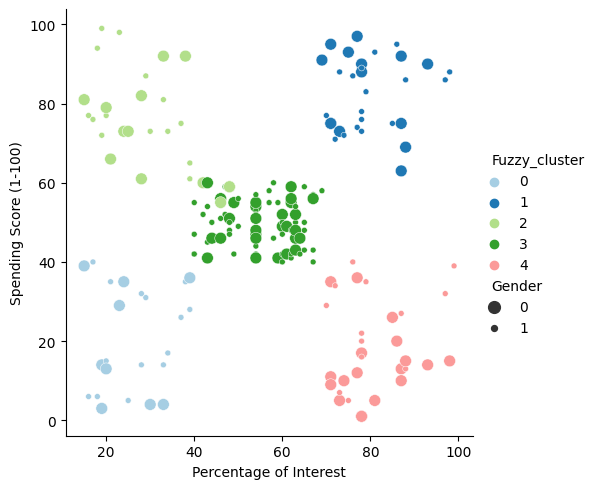

In [154]:
sns.relplot(x='Percentage of Interest', y='Spending Score (1-100)',hue='Fuzzy_cluster', size="Gender",
             data=mall_dataset, palette = "Paired")

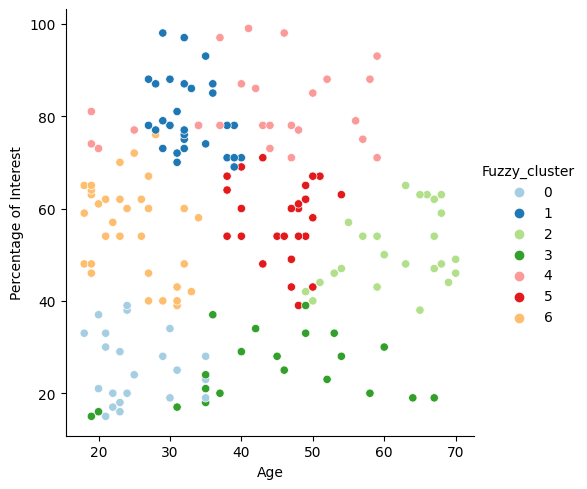

In [111]:
sns.relplot(x='Age', y='Percentage of Interest', hue='Fuzzy_cluster', data=mall_dataset, palette = "Paired")

#### Evaluating Fuzzy C-Means

In [155]:
print("Silhouette score: {}".format(silhouette_score(mall_dataset.drop(['Fuzzy_cluster'], axis=1), fcm_labels)))
print("Davies Bouldin score: {}".format(davies_bouldin_score(mall_dataset.drop(['Fuzzy_cluster'], axis=1), fcm_labels)))
print("Calinski Harabasz score: {}".format(calinski_harabasz_score(mall_dataset.drop(['Fuzzy_cluster'], axis=1), fcm_labels)))

Silhouette score: 0.4462342998599262
Davies Bouldin score: 0.8262932778809244
Calinski Harabasz score: 143.84662132838284
